In [108]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [109]:
#Load datasets
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

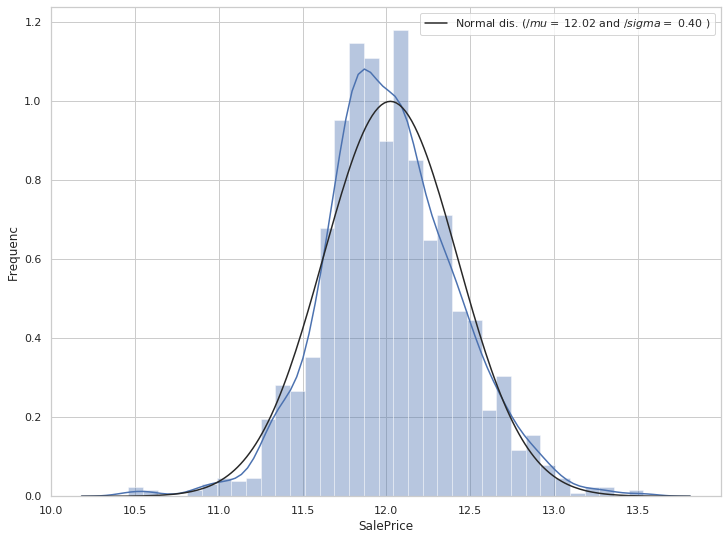

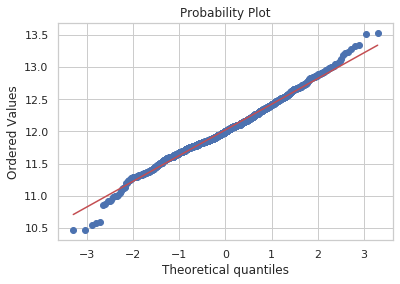

In [110]:
#Log func normalizing
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(train['SalePrice'])
plt.legend(['Normal dis. ($/mu=$ {:.2f} and $/sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequenc')
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [111]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

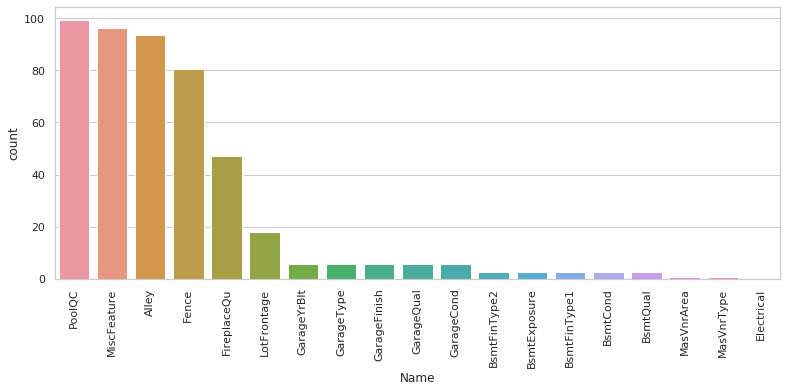

In [112]:
#How many "NA" in trainset?
isnull = train.isnull().sum()/len(train)*100
isnull = isnull[isnull > 0]
isnull.sort_values(inplace = True, ascending = False)
isnull = isnull.to_frame()
isnull.columns = ['count']
isnull.index.names = ['Name']
isnull['Name'] = isnull.index
plt.figure(figsize = (13, 5))
sns.set(style = 'whitegrid')
sns.barplot(x = 'Name', y = 'count', data = isnull)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

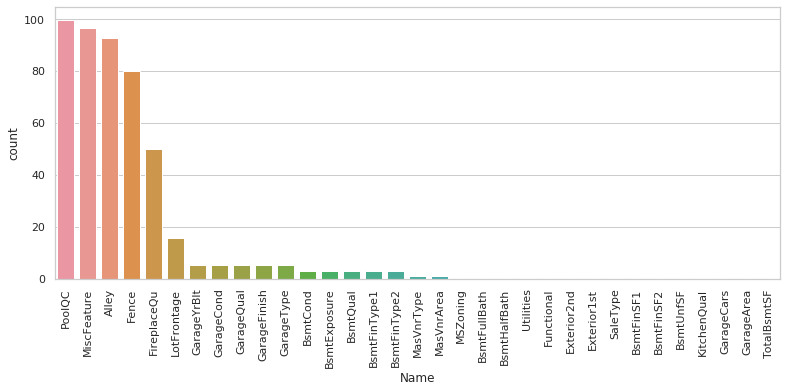

In [113]:
#How many "NA" in testset?
isnull_t = test.isnull().sum()/len(test)*100
isnull_t = isnull_t[isnull_t > 0]
isnull_t.sort_values(inplace = True, ascending = False)
isnull_t = isnull_t.to_frame()
isnull_t.columns = ['count']
isnull_t.index.names = ['Name']
isnull_t['Name'] = isnull_t.index
plt.figure(figsize = (13, 5))
sns.set(style = 'whitegrid')
sns.barplot(x = 'Name', y = 'count', data = isnull_t)
plt.xticks(rotation=90)
plt.show

In [115]:
#Cleansing missing values
train=train.drop(['PoolQC', 'MiscFeature','Alley', 'Fence','GarageYrBlt','Utilities'],axis=1)
test=test.drop(['PoolQC', 'MiscFeature','Alley', 'Fence','GarageYrBlt','Utilities'],axis=1)

#Categorical values to 'na'
NA_train_list = ['FireplaceQu', 'GarageType','GarageCond','GarageQual','GarageFinish','BsmtFinType2',
         'BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']
NA_test_list = ['FireplaceQu', 'GarageType','GarageCond','GarageQual','GarageFinish','BsmtFinType2',
         'BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']
train[NA_train_list] = train[NA_train_list].fillna('na')
test[NA_test_list] = test[NA_test_list].fillna('na')

#Electrical - fillna most frequent value
ind=train[train['Electrical'].isnull()==True].index
train.loc[ind,'Electrical'] = train['Electrical'].value_counts().keys()[0]
test.loc[ind,'Electrical'] = test['Electrical'].value_counts().keys()[0]

#Numerical values to 0
train['LotFrontage'] = train['LotFrontage'].fillna(0)
test['LotFrontage'] = test['LotFrontage'].fillna(0)
ind_train=train[['MasVnrArea','MasVnrType','SalePrice']][train['MasVnrArea'].isnull()==True].index
ind_test=train[['MasVnrArea','MasVnrType']][test['MasVnrArea'].isnull()==True].index
train.loc[ind_train,'MasVnrArea'] = 0
test.loc[ind_test,'MasVnrArea'] = 0
for i in ['Functional', 'SaleType', 'Exterior2nd', 'Exterior1st', 'KitchenQual']:
    test.loc[test[test[i].isnull()==True].index,i]=test[i].value_counts().keys()[0]
for i in ['BsmtFullBath','BsmtFinSF2','BsmtFinSF2','BsmtUnfSF','GarageCars','GarageArea','TotalBsmtSF','BsmtFinSF1','BsmtHalfBath']:
    test.loc[test[test[i].isnull()==True].index,i]=0

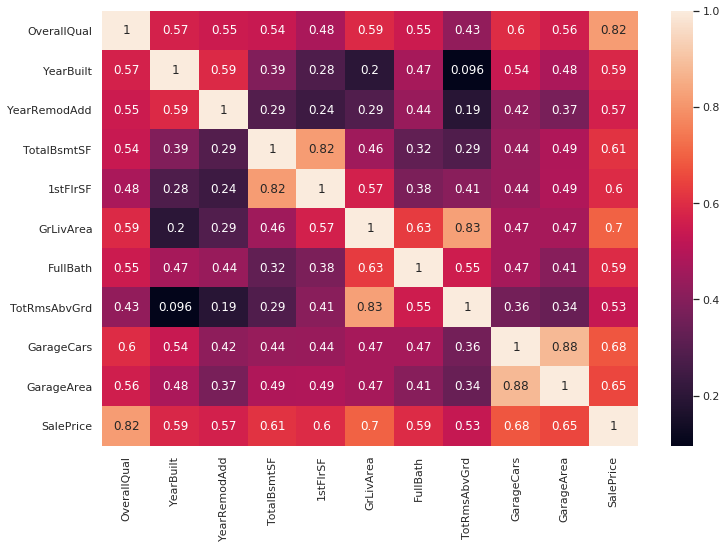

In [116]:
#Preparing dates to matrix
train_corr = train.select_dtypes(include = [np.number])
train_corr.shape
del train_corr['Id'] #removed unnecessary metric
corr = train_corr.corr()
#Cut the matrix to values greater than 0.5 to build a simpler matrix
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12,8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot = True)
plt.show()

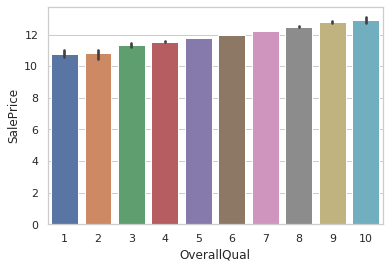

In [117]:
#Viewing corr OverallQual to SalePrice
train.OverallQual.unique()
sns.barplot(train.OverallQual, train.SalePrice)

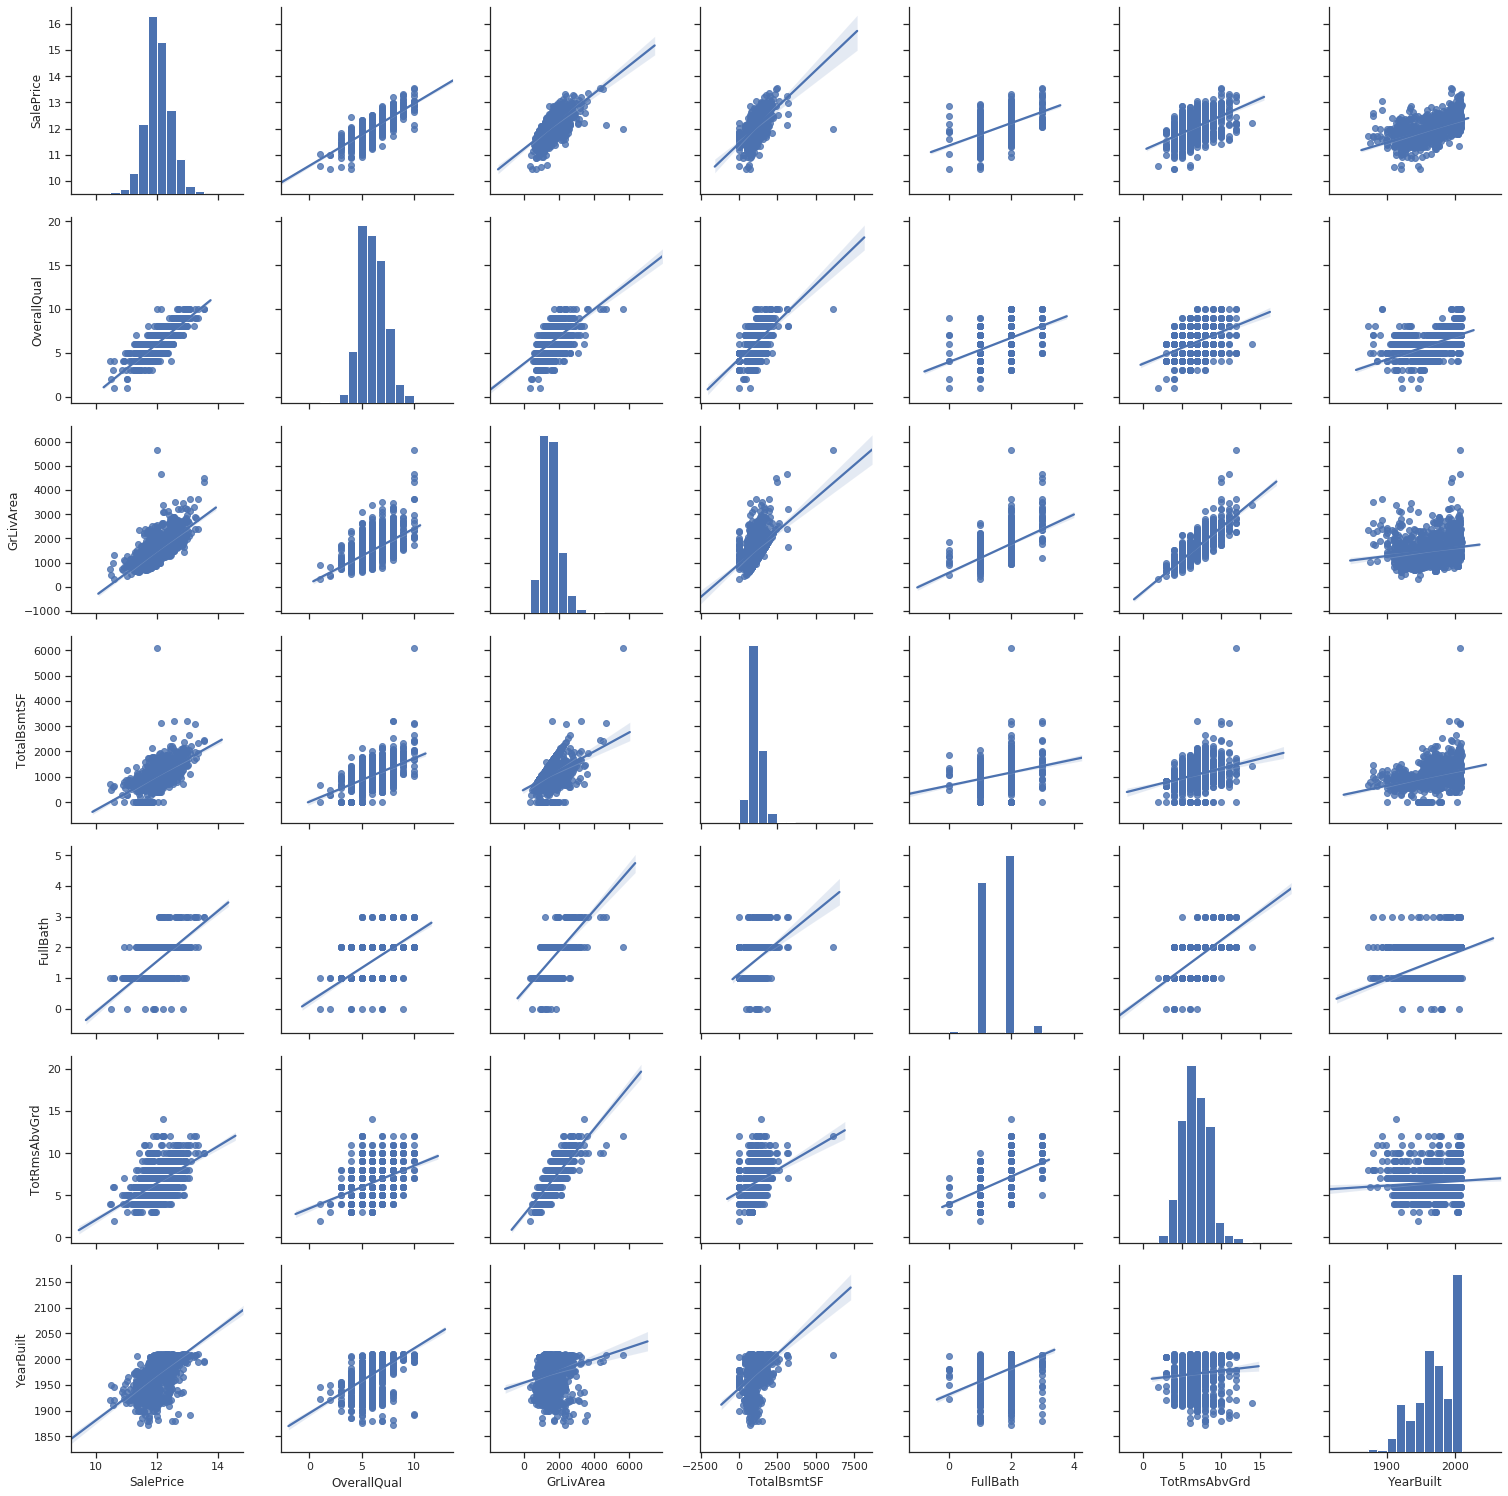

In [92]:
#Viewing corr matrix in graphs
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style = 'ticks')
sns.pairplot(train[col], height=3, kind='reg')

In [118]:
print('The most importent feature relative to target')
corr = train.corr()
corr.sort_values(['SalePrice'],ascending = False, inplace = True)
corr.SalePrice

The most importent feature relative to target


SalePrice        1.000000
OverallQual      0.817221
GrLivArea        0.700904
GarageCars       0.680677
GarageArea       0.650904
TotalBsmtSF      0.612292
1stFlrSF         0.597063
FullBath         0.594789
YearBuilt        0.586554
YearRemodAdd     0.565603
TotRmsAbvGrd     0.534391
Fireplaces       0.489417
MasVnrArea       0.426717
BsmtFinSF1       0.372305
WoodDeckSF       0.338278
OpenPorchSF      0.321143
2ndFlrSF         0.319212
HalfBath         0.314413
LotArea          0.257316
BsmtFullBath     0.236564
BsmtUnfSF        0.221860
BedroomAbvGr     0.209087
LotFrontage      0.179430
ScreenPorch      0.121158
PoolArea         0.069786
MoSold           0.057307
3SsnPorch        0.054878
BsmtFinSF2       0.005154
BsmtHalfBath    -0.005200
Id              -0.017597
MiscVal         -0.020040
OverallCond     -0.036791
YrSold          -0.037235
LowQualFinSF    -0.037989
MSSubClass      -0.074164
KitchenAbvGr    -0.147600
EnclosedPorch   -0.149137
Name: SalePrice, dtype: float64

In [119]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC',  'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
    
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

In [120]:
#Take targate variable into y
y = train['SalePrice']
#Delete the saleprice from train 
del train['SalePrice']
#Take their values in X and y
y = y.values
X = train.values

In [122]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()
#Fit the model
X_test = test.values
model.fit(X, y)
#Prediction
print("Predict value " + str(model.predict([X[142]])))
print("Real value " + str(y[142]))
#Accuracy 
print(f"Accuracy --> {model.score(X_test, y)*100}%", )

Predict value [11.72581807]
Real value 12.019749091416921
Accuracy --> -87.27753973246952%


In [126]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state = 10)
GBR.fit(X, y)
#Prediction
print("Predict value " + str(GBR.predict([X[142]])))
print("Real value " + str(y[142]))
#Accuracy 
print(f"Accuracy --> {GBR.score(X_test, y)*100}%")

Predict value [11.79836006]
Real value 12.019749091416921
Accuracy --> -90.22469058321204%


In [127]:
predictions = GBR.predict(X_test)
submission = pd.DataFrame()
submission['Id'] = test.Id
submission['SalePrice'] = np.exp(predictions)
submission.to_csv('prediction_GBRnew.csv',index = False)